In [231]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math as mt
from PIL import Image
import seaborn as sb
from scipy.stats import ttest_ind

In [74]:
ruta = 'C:/Users/Natalia Lopera/Documents/Python_projects/sprint_6/Sprint_6/games.csv'
df= pd.read_csv(ruta) #Lectura de datos

In [75]:
df.info() #imprimir la información general de los datos
print(df.isna().sum()) #Contar valores nulos en cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
R

In [76]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


*Comentarios generales:*

* las columnas 'other_sales', 'jp_sales', 'eu_sales', 'na_sales' y 'platform' son las únicas que no tienen valores nulos. De este conjunto los datos de platform son tipo object, lo cual es adecuado, las demás columnas tienen datos tipo float que por ahora se asume como adecuado también

* las columnas 'name' y 'genre' tienen dos valores nulos. Ambas columnas tienen datos tipo object, lo que es adecuado. 

* la columna 'year_of_release' tiene aproximadamente 269 valores nulos: esta columna tiene datos tipo float, se considera adecuado cambiarlo a tipo int (entero) ya que al ser el año de lanzamiento, no tiene mucho sentido que sea un numero flotante.

* la columna 'critic_score' tiene aproximadamente 8.578 valores nulos. Tiene datos tipo float, sin embargo, haciendo una revisión de los datos, estos pueden ser convertidos a int, ya que ninguno realmente tiene un decimal diferente a 0, por lo que se opta por cambio de tipo de datos.

* la columna 'user_score' tiene 6.701 valores nulos, es de tipo object lo cual no es adecuado, porque los datos son flotantes, por lo que se opta por cambio de object a float.

* la columna 'rating' tiene 6.766 valores nulos. Contiene datos tipo object,lo cual es adecuado. 

* Se opta por cambiar todas las letras a minuscula, y en columnas como name y genre sistematizar un unico formato de separación de palabras. 

In [77]:
#se cambia el nombre de todas las columnas a minusculas 
df.columns=df.columns.str.lower()


Cambios en el tipo de dato

In [78]:
#Convierte las columnas year of release y critic_score en int 64
columns_to_int= ['year_of_release', 'critic_score']
df[columns_to_int] = df[columns_to_int].apply(pd.to_numeric, errors='coerce')
df[columns_to_int] = df[columns_to_int].astype('Int64')

#Convierte la columna user_score en float
df['user_score']= pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'] = df['user_score'].astype('float64')

Procesamiento de valores ausentes

In [79]:
#se reemplazan los datos nulos en las columnas cualitativas por un espacio en blanco.
columns_to_replace = ['name', 'genre', 'rating']

for col in columns_to_replace:
    df[col] = df[col].fillna(' ')
    
#Se reemplazan los datos nulos en la columna year of release con la mediana
year_median = df['year_of_release'].median()
df.fillna({'year_of_release':year_median}, inplace=True)



In [80]:
print(f'La mediana es: {df["critic_score"].median()}')
print(f'La media es: {df["critic_score"].mean()}')
print(f'Se opta por utilizar la mediana para reemplazar los datos ausentes de la columna critic score,\nteniendo en cuenta que aunque no hay una diferencia significativa entre la media y la mediana, \nla desviación estandar de esta columna es de 9.7, lo que podría indicarnos una dispersión \nconsiderable de los datos en relación a la media y la existencia de valores atipicos')

#se reemplazan los valores nulos de la columna critic score con la media
critic_median = df['critic_score'].median()
df.fillna({'critic_score': round(critic_median)}, inplace=True)

La mediana es: 71.0
La media es: 68.96767850559173
Se opta por utilizar la mediana para reemplazar los datos ausentes de la columna critic score,
teniendo en cuenta que aunque no hay una diferencia significativa entre la media y la mediana, 
la desviación estandar de esta columna es de 9.7, lo que podría indicarnos una dispersión 
considerable de los datos en relación a la media y la existencia de valores atipicos


In [81]:
print(f'La mediana es: {df["user_score"].median()}')
print(f'La media es: {df["user_score"].mean()}')
print(f'Se opta por utilizar la media para reemplazar los datos ausentes de la columna user score,\nconsiderando que la media y la mediana tienen valores cercanos y que la desviación estandar es de 1, \nlo cual, en comparación con otras columnas, no podría considerarse ni alta ni baja')

#Se reemplazan los valores ausentes de la columna user score con la media
user_media= df['user_score'].mean()
df.fillna({'user_score':round(user_media)}, inplace=True)

La mediana es: 7.5
La media es: 7.125046113306982
Se opta por utilizar la media para reemplazar los datos ausentes de la columna user score,
considerando que la media y la mediana tienen valores cercanos y que la desviación estandar es de 1, 
lo cual, en comparación con otras columnas, no podría considerarse ni alta ni baja


In [82]:
#Corrrobora que lo anterior se ejecutó exitosamente
#df.info()
#df.isna().sum()

*Comentarios Generales:* 

* En el caso de las columnas con datos cualitativos (object), los valores ausentes se reemplazaron con un espacio en blanco. 

* En el caso de las columnas con valores cuantitativos, se utilizó la media (caso de user score y critic score) y la mediana (caso de year of release) para reemplazar estos valores. 

* La columna user_score tenía algunos valores en 'tbd', pero considerando que esos valores no nos aportaban datos, se decidió tratarlos como valores nulos.


* Respecto a la columna name, se revisa la pertinencia de eliminar las dos filas que tienen datos nulos, ya que solo tienen información de la plataforma, el año de lanzamiento y las ventas regionales, pero se opta por no hacerlo ya que al revisar los valores minimos y máximos, así como la media y la mediana de las ventas regionales, se concluye que estos datos pueden ser relevantes, y a lo mejor se puedan establecer tendencias a partir de la plataforma y el año de lanzamiento.

* Los datos de la columna year of release se cambiaron por tipo entero (int) para que fuera posible usar metodos como min() y max(), lo cual no sería posible si se hubieran cambiado a tipo object. Ahora bien, al ser años no tiene mucho sentido aplicarle la media, por eso se opta por usar la mediana para reemplazar los valores ausentes 


#### *Sistematización de caracteres en las columnas name, platform, rating y genre*

In [83]:
#Se reemplaza la categoría K-A por E
df['rating']=df['rating'].replace('K-A', 'E')

#Se unifican las letras en minuscula de las columnas name, platform y genre
df[['name', 'platform', 'genre']]= df[['name', 'platform', 'genre']].apply(lambda x: x.str.lower())

#Se eliminan algunos caracteres de la columna name
df['name'] = df['name'].str.replace('.', '').str.replace('!', '').str.replace(':', '').str.replace('-', ' ').str.replace('/', '-')

*Comentarios Generales:*

* Columna rating: 

Significado de las categorias: (E: Everyone, E10+: Everyone 10 and older, T: Teen o 13 años o mas, M: Mature, AO: Adults only, EC: Early Childhood, RP: Rating Pending, K-A: Esta clasificación significa Kids to adults, hasta 1998 fue usada para hacer referencia a la clasificacion everyone, pero luego de ese año se cambió por E, por tanto, para evitar confusiones, también aquí se reemplazará esta categoria por la E) 

En esta columna se dejarán las categorías en mayuscula, ya que es el formato de clasificación, además porque todas tienen el mismo formato

* Se quitaron varios caracteres de la columna name, esta columna usaba '/' para separar algunas palabras, pero para unificarlo con el formato de la columna genre se optó por cambiar esto por el simbolo '-'

In [84]:
print(df.loc[0])

name               wii sports
platform                  wii
year_of_release          2006
genre                  sports
na_sales                41.36
eu_sales                28.96
jp_sales                 3.77
other_sales              8.45
critic_score               76
user_score                8.0
rating                      E
Name: 0, dtype: object


In [85]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16715.0,16715.000000,16715.000000,16715.000000,16715.000000,16715.0,16715.000000
mean,2006.492911,0.263377,0.145060,0.077617,0.047342,70.010649,7.056781
std,5.829925,0.813604,0.503339,0.308853,0.186731,9.777494,1.012669
min,1980.0,0.000000,0.000000,0.000000,0.000000,13.0,0.000000
25%,2003.0,0.000000,0.000000,0.000000,0.000000,71.0,7.000000
50%,2007.0,0.080000,0.020000,0.000000,0.010000,71.0,7.000000
75%,2010.0,0.240000,0.110000,0.040000,0.030000,71.0,7.300000
max,2016.0,41.360000,28.960000,10.220000,10.570000,98.0,9.700000


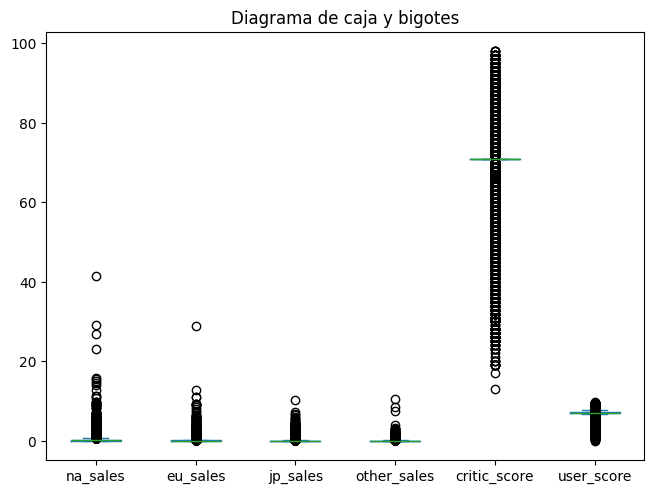

In [86]:
#Gráficar diagrama de cajas y bigotes
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].plot(kind='box', title= 'Diagrama de caja y bigotes');
plt.tight_layout(pad= 0.2, w_pad=1.0, h_pad=8.0);
plt.show();
#df['na_sales'].plot(kind='box');
#df['eu_sales'].plot(kind='box');
#df['jp_sales'].plot(kind='box');
#df['other_sales'].plot(kind='box');
#df['critic_score'].plot(kind='box');
#df['user_score'].plot(kind='box');

In [87]:
#verificar la frecuencia de valores en el conjunto de datos de critic_score. 
frecuencia_valores = df['critic_score'].value_counts().sort_values(ascending=False).head(35)

*Comentarios Generales:*

* year_of_release es una variable cuantitativa discreta y categorica, por lo que analizar la media no tendría demasiado sentido y en esa medida tampoco la desviación estandar.

* na_sales, eu_sales, jp_sales y other_sales tienen una desviación estandar baja, pero si se observa el diagrama de caja y bigotes pueden observarse algunos valores atipicos, esto amerita un analisis un poco más específico:
el valor minimo de na_sales es 0, el 25% de los valores se encuentran también por debajo de 0, el 50% se encuentra por debajo de 0.02 y el 75% se encuentra por debajo de 0.24, si se mira a detalle el 75% de los valores estan más o menos agrupados en un rango cercano de datos, por eso en el diagrama de cajas, es casi imperceptible la distribución de estos valores. Sin embargo, el valor maximo de este conjunto de datos es 41.36, es decir que tenemos valores en un rango de 0.24 a 41.36 y estos vendrian siendo los valores atipicos. La desviación estandar puede que no sea muy alta porque como se mencionó el 75% de los datos esta mas o menos cercanos a la media que es 0.26, pero esto no invalida la existencia de un conjunto de valores atipicos.
Esta misma logica es aplicable al caso de eu_sales, jp_sales y other_sales.   

* User score tiene una desviación estandar de 1, lo cual evidencia un incremento en la dispersión, en comparación con las columnas mencionadas, sin embargo no se considera una cifra demasiado alta. Esta columna tiene unas dinamicas parecidas a las explicadas anteriormente, con una tendencia negativa, el 50% de los datos estan por debajo de 7.00, pero el valor minimo es 0, esto indicaría que en ese rango entre 0 y 7.00 hay un conjunto de datos, mas cercano a 0 que a 7.00 que son extremos o poco comunes y esos son los valores atipicos que se observan en el diagrama de caja. Pasa igual en los valores atipicos que estan cercanos a 9.70. Pero la desviación estandar   

* La desviación estandar de Critic score es de 9.7, lo que, en comparación con las demás columnas, podría considerarse una cifra significativa, pero con esta columna hay que tener en cuenta que los valores ausentes eran un poco más de la mitad, y se optó por reemplazarlos con la mediana, considerando que incluso antes de que se reemplazaran, la desviación estandar ya era bastante alta, de un 13.0 aproximadamente. Asimismo, vale destacar que la mediana es 71, entonces al haber reemplazado casi la mitad de los datos con el mismo valor, hizo que la desviación estandar disminuyera, pero también hizo que la mayoría de los datos estuvieran muy cerca a la media, y que los demás valores aparecieran como valores atipicos. 

#### *Analisis de datos* 

In [88]:
#Se agrega la columna de total_sales para cada video juego
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']


In [89]:
#Se agrupan los videojuegos por año de lanzamiento
game_per_year= df.groupby(['year_of_release','name'])['year_of_release'].count()

#Filtro para saber el nomrbe de los videojuegos en función del año de lanzamiento
game_per_year_filtered = game_per_year[game_per_year.index.get_level_values('year_of_release') == 2007]
game_per_year_filtered

year_of_release  name                                                                             
2007             2 games in 1 double pack the incredibles - finding nemo the continuing adventures    1
                 300 march to glory                                                                   1
                 7 wonders of the ancient world                                                       2
                 aa megami samaa                                                                      1
                 ace another century's episode 3 the final                                            1
                                                                                                     ..
                 zettai onkan otoda master                                                            1
                 zoey 101 field trip fiasco                                                           1
                 zoids assault                                       

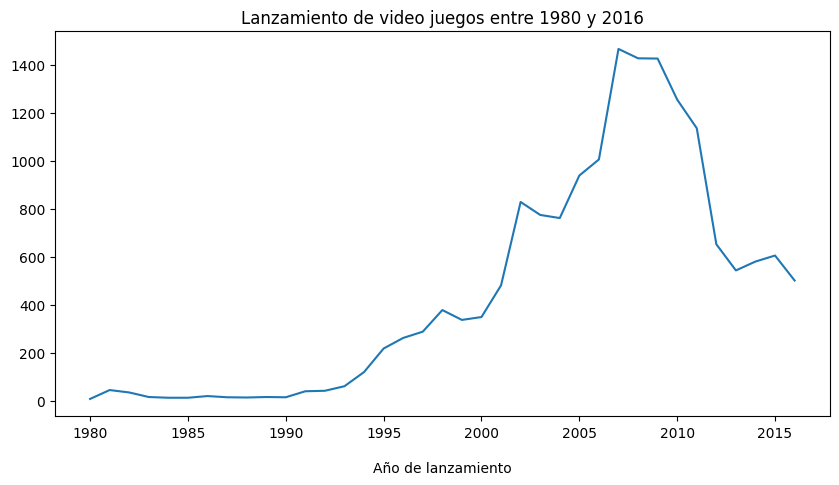

year_of_release
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
Name: year_of_release, dtype: Int64

In [90]:
#Cantidad de juegos lanzados por año
df_per_year= df.groupby('year_of_release')['year_of_release'].count()
#df_per_year.sort_values(ascending=False).head(20)
ax=df_per_year.plot(x='year_of_release', title= 'Lanzamiento de video juegos entre 1980 y 2016', figsize= [10,5], xlabel= 'Año de lanzamiento')
ax.set_xlabel('Año de lanzamiento', labelpad=15)
plt.show()
df_per_year.sort_values(ascending=False).head(20)


*Sobre el año de lanzamiento*:

Entre los años 2006 y 2011 se presentó la mayor cantidad de lanzamientos de videojuegos. Aunque si se observa la gráfica se puede concluir que hasta el 2007 hubo un incremento uniforme en el lanzamiento de videojuegos, siendo este año el pico para luego presentar un declive.  




In [91]:
#Se analiza el total de ventas por año y plataforma
sales_platforms = df.groupby(['year_of_release', 'platform'])['total_sales'].sum()

#Se identifican las plataformas más exitosas en función de la cantidad de ventas que han hecho
successed_platforms= sales_platforms.sort_values(ascending= False).head(10)
#unique_values= successed_platforms['platform'].unique()
#unique_values
successed_platforms


year_of_release  platform
2004             ps2         211.81
2009             wii         206.97
2002             ps2         205.38
2003             ps2         184.31
2008             wii         171.32
2010             x360        170.03
1998             ps          169.49
2007             wii         169.10
2001             ps2         166.43
2005             ps2         160.66
Name: total_sales, dtype: float64

In [92]:
#Se crea una variable con la información de las plataformas más exitosas
selected_platforms = ['ps2', 'wii', 'x360', 'ps', 'ps3', 'sd', 'ps4', 'xone', '3ds']
most_successful_platforms= sales_platforms[sales_platforms.index.get_level_values('platform').isin(selected_platforms)]

#Se calcula entre el universo de plataformas más exitosas, cual tuvo más ventas de acuerdo al año
most_successful_by_year = most_successful_platforms.groupby('year_of_release').idxmax()
most_successful_by_year

year_of_release
1994      (1994, ps)
1995      (1995, ps)
1996      (1996, ps)
1997      (1997, ps)
1998      (1998, ps)
1999      (1999, ps)
2000      (2000, ps)
2001     (2001, ps2)
2002     (2002, ps2)
2003     (2003, ps2)
2004     (2004, ps2)
2005     (2005, ps2)
2006     (2006, wii)
2007     (2007, wii)
2008     (2008, wii)
2009     (2009, wii)
2010    (2010, x360)
2011     (2011, ps3)
2012     (2012, ps3)
2013     (2013, ps3)
2014     (2014, ps4)
2015     (2015, ps4)
2016     (2016, ps4)
Name: total_sales, dtype: object

,year_of_release,platform,sales_per_year
10,2007,ps,3.28
9,2003,ps,2.07
8,2002,ps,6.67
7,2001,ps,35.59
6,2000,ps,96.37
5,1999,ps,144.53
4,1998,ps,169.49
3,1997,ps,136.17
2,1996,ps,94.70
1,1995,ps,35.96


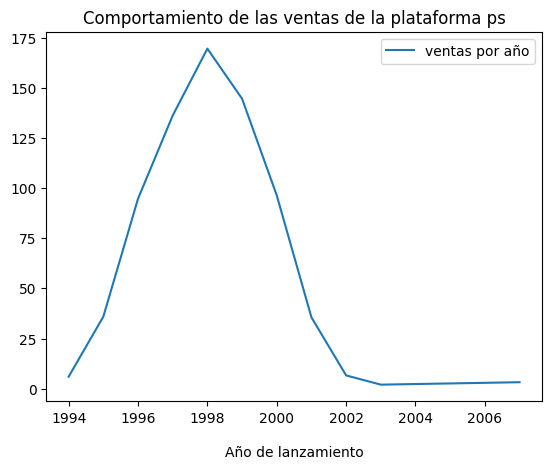

In [93]:
#Se analiza el comportamiento de las ventas de la plataforma ps
ps = sales_platforms[sales_platforms.index.get_level_values('platform').isin(['ps'])]
ps = ps.to_frame(name='sales_per_year').reset_index()
ps_graphic= ps.plot(x='year_of_release', y='sales_per_year', title= 'Comportamiento de las ventas de la plataforma ps', xlabel= 'año de lanzamiento');
ps_graphic.set_xlabel('Año de lanzamiento', labelpad=15);
plt.legend(['ventas por año']);
ps.sort_values(by= 'year_of_release', ascending= False).head(11)

,year_of_release,platform,sales_per_year
11,2011,ps2,0.45
10,2010,ps2,5.64
9,2009,ps2,26.40
8,2008,ps2,53.90
7,2007,ps2,98.20
6,2006,ps2,103.42
5,2005,ps2,160.66
4,2004,ps2,211.81
3,2003,ps2,184.31
2,2002,ps2,205.38


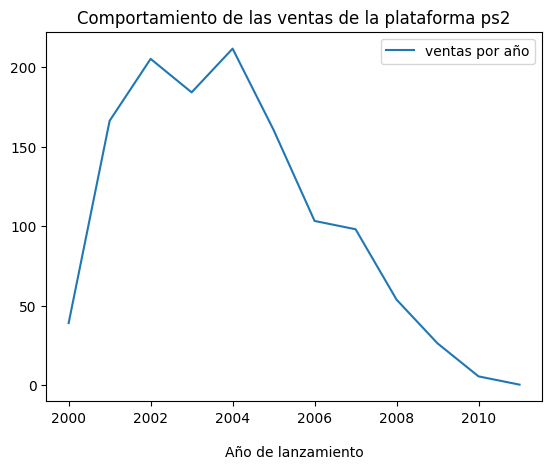

In [94]:
#Se analiza el comportamiento de las ventas de la plataforma ps2
ps2 = sales_platforms[sales_platforms.index.get_level_values('platform').isin(['ps2'])]
ps2 = ps2.to_frame(name='sales_per_year').reset_index()
ps2_graphic= ps2.plot(x='year_of_release', y='sales_per_year', title= 'Comportamiento de las ventas de la plataforma ps2', xlabel= 'año de lanzamiento');
ps2_graphic.set_xlabel('Año de lanzamiento', labelpad=15);
plt.legend(['ventas por año']);
ps2.sort_values(by= 'year_of_release', ascending= False).head(15)

,year_of_release,platform,sales_per_year
10,2016,wii,0.18
9,2015,wii,1.14
8,2014,wii,3.75
7,2013,wii,8.59
6,2012,wii,21.71
5,2011,wii,59.65
4,2010,wii,127.95
3,2009,wii,206.97
2,2008,wii,171.32
1,2007,wii,169.10


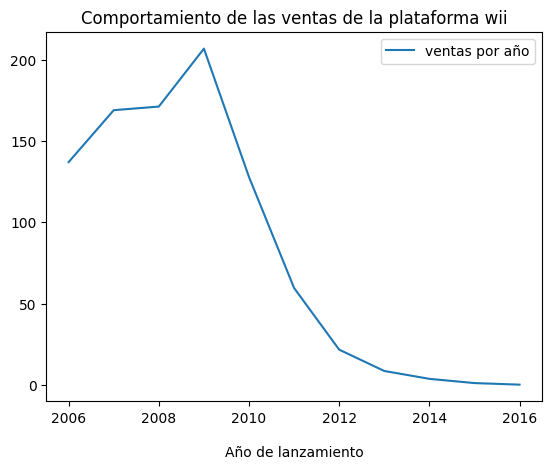

In [95]:
#Se analiza el comportamiento de las ventas de la plataforma wii
wii= sales_platforms[sales_platforms.index.get_level_values('platform').isin(['wii'])]
wii = wii.to_frame(name='sales_per_year').reset_index()
wii_graphic= wii.plot(x='year_of_release', y='sales_per_year', title= 'Comportamiento de las ventas de la plataforma wii', xlabel= 'año de lanzamiento');
wii_graphic.set_xlabel('Año de lanzamiento', labelpad=15);
plt.legend(['ventas por año']);
wii.sort_values(by= 'year_of_release', ascending= False).head(20)

,year_of_release,platform,sales_per_year
11,2016,x360,1.52
10,2015,x360,11.96
9,2014,x360,34.74
8,2013,x360,88.58
7,2012,x360,99.74
6,2011,x360,143.84
5,2010,x360,170.03
4,2009,x360,120.29
3,2008,x360,135.26
2,2007,x360,105.59


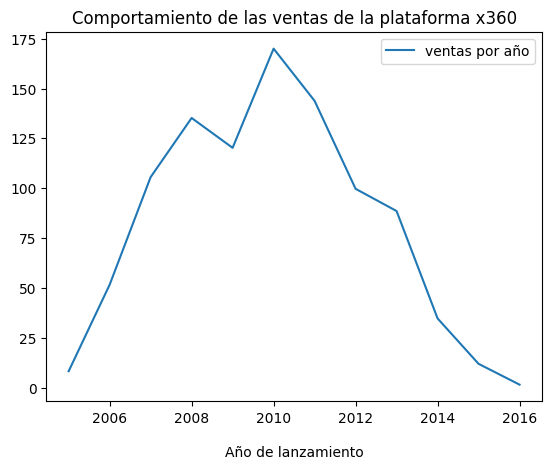

In [96]:
#Se analiza el comportamiento de las ventas de la plataforma x360
x360=sales_platforms[sales_platforms.index.get_level_values('platform').isin(['x360'])]
x360 = x360.to_frame(name='sales_per_year').reset_index()
x360_graphic= x360.plot(x='year_of_release', y='sales_per_year', title= 'Comportamiento de las ventas de la plataforma x360', xlabel= 'año de lanzamiento');
x360_graphic.set_xlabel('Año de lanzamiento', labelpad=15);
plt.legend(['ventas por año']);
x360.sort_values(by= 'year_of_release', ascending= False).head(20)

*Comentarios Generales*:

* Para identificar las plataformas más populares, se tomaron los valores correspondientes a las 10 ventas más altas, obteniendo un universo de plataformas compuesto por 'ps2', 'wii', 'x360' y 'ps'. Aunque todas estas plataformas pasaron también de ser las más populares, en un periodo de tiempo, a tener ventas de 3.0 o menos. 

* ps (playstation) tiene su auge entre 1994 y los años 2000. Su pico en ventas fue en 1998. El primer registro que se tiene de la plataforma es en 1994, cuando se lanza la play station 1, realmente desde ese año lideró las ventas en comparación con otras plataformas, aunque en 1994 sus ventas no eran realmente muy altas, y ese liderazgo le duró unos 7 años aproximadamente. Su declive tiene relación con el lanzamiento de la play station 2 en el año 2000, que automaticamente pasó a ser la plataforma con más ventas entre el año 2001 y 2005.

* ps2 (playstation 2) logra liderar las ventas un año después de su lanzamiento. Cabe resaltar que logra pasar de 39,17 ventas en el 2000 a 166,41 en el 2001, lo cual es un crecimiento bastante acelerado. Tiene dos picos importantes: uno en el 2002 con un maximo de ventas de 205,38, y el otro en el año 2004 con 211,81, que es también su punto maximo, despues de este año empieza un declive en sus ventas, aunque mantiene su liderazgo hasta el año 2006 cuando es lanzada la Wii. 

* Con la wii hay algo interesante a destacar y es que esta fue lanzada a finales del año 2006, y aún así logró liderar las ventas durante ese mismo año, lo cual no sucedió en el caso de la play station 2, que fue lanzada a principios del año 2000, pero logró quitarle el liderazgo en ventas a la play station 1 en el año 2001, un año después de su lanzamiento. 

* Continuando con la wii, está lideró las ventas entre el 2006 y el 2009, tuvo su punto maximo en el 2009 y de ahí inicia su declive en ventas, que es superado por la xbox 360 en el año 2010. 

* La Xbox 360 tiene la particularidad de tener un auge tardío y muy corto, pues esta plataforma fue lanzada a finales del 2005, y apenas en el 2010 logró superar a las otras 4 plataformas. Es decir, se tardó aproximadamente unos 5 años para lograr popularidad. Tiene dos picos importantes: uno en el 2008 con ventas de 135.26 y otro en el 2010 con un total de 170.03. Además el liderazgo en las ventas solo duró un año, porque en el 2011 la play station 3 logra rebasarlo en ventas.

* En cuanto al declive de estas plataformas, todas fueron descontinuadas en fechas diferentes, sin embargo, las 4 tienen como patrón que despues de su auje pasaron de ser populares a tener muy pocas ventas. De hecho, contando después del punto maximo en ventas, en los cuatro casos pasaron entre 6 y 7 años no solo para ser descontinuadas, sino también para alcanzar ventas muy bajas, que en el mejor caso no superan los 3.8 millones.Aunque hay que destacar que sony ha sido la compañía que ha logrado mantener el liderazgo de las ventas por más tiempo con los distintos modelos de la play station; teniendo en cuenta que el liderazgo de wii fue de 4 años (2006-2009) y la xbox lo tuvo solo por un año (2010).   

In [97]:
print(f'Nota: se analizó el periodo 2004 - 2016, y se optó por comparar el comportamiento de las ventas en el año 2007 \nconsiderando que es en el que existe más competencia entre plataformas y el año 2016 para ver las dinamicas actuales')

Nota: se analizó el periodo 2004 - 2016, y se optó por comparar el comportamiento de las ventas en el año 2007 
considerando que es en el que existe más competencia entre plataformas y el año 2016 para ver las dinamicas actuales


In [98]:
#Se filtra el dataframe original de acuerdo al periodo de tiempo determinado (2004 - 2016)
chosen_period = df[(df['year_of_release'] >= 2004) & (df['year_of_release'] <= 2016)]
chosen_period


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,new super mario bros,ds,2006,platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,score international baja 1000 the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,71,7.0,,0.00
16710,samurai warriors sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,71,7.0,,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,71,7.0,,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,71,7.0,,0.01


In [99]:
#Comportamiento de las ventas desde 2004 hasta 2016
sales_behavior= chosen_period.groupby('year_of_release')['total_sales'].sum()
sales_behavior
#sales_graphic= sales_behavior.plot(x='year_of_release', title= 'Comportamiento de las ventas entre 2004 y 2016', xlabel= 'años')
#sales_graphic.set_xlabel('Años', labelpad=15);
print(f'Si se observa la gráfica, puede evidenciarse que el 2007 fue el año más prospero para la industria \nno solo concentra las ventas más altas, sino que también es donde hay mayor competencia entre paltaformas \ny mayor cantidad de video juegos lanzados. \nPosterior al 2007 las ventas empiezan a entran en declive. Esta gráfica coincide con la de lanzamiento \nde video juegos por año')

Si se observa la gráfica, puede evidenciarse que el 2007 fue el año más prospero para la industria 
no solo concentra las ventas más altas, sino que también es donde hay mayor competencia entre paltaformas 
y mayor cantidad de video juegos lanzados. 
Posterior al 2007 las ventas empiezan a entran en declive. Esta gráfica coincide con la de lanzamiento 
de video juegos por año


*Relación ventas y año*:

* Considerando el referente temporal que se tiene, si se comparan el comportamiento de ventas de videojuegos asociados a las diferentes versiones de play station, podría evidenciarse que las ventas para play station 2 son más altas que las de play station 3 y 4. (Como puede observarse en la gráfica a continuación) y justamente, la play station 2 tiene su auge entre 2001 y el 2005. 

Se toma como ejemplo la play station porque es la plataforma más popular y la que ha logrado mantener un liderazgo en las ventas, con excepción a algunos periodos cortos de tiempo. Pero analizar el comportamiento de esta plataforma permite ver que aunque play station 3 haya liderado las ventas entre 2011 y 2013, la cantidad de video juegos vendidos está por debajo de la cantidad de video juegos vendidos para la ps2, y lo mismo pasa con la ps3. Eso quiere decir que aunque la plataforma siga siendo una de las más populares, sus ventas han disminuido en relación a lo que se vendía a principios de los años 2000 

In [100]:
#se agrupan los datos de play station 3 en la variable ps3
ps3 = sales_platforms[sales_platforms.index.get_level_values('platform').isin(['ps3'])]
ps3 = ps3.to_frame(name='sales_per_year').reset_index()

#se agrupan los datos de play station 4 en la variable ps4
ps4 = sales_platforms[sales_platforms.index.get_level_values('platform').isin(['ps4'])]
ps4 = ps4.to_frame(name= 'sales_per_year').reset_index()

In [101]:
#Se agrupan en una variable los dataframes ps2, ps3 y ps4
all_playstations = pd.concat([ps2, ps3, ps4])
#Se establece la distribución de los datos al interior del nuevo dataframe
playstation_comparison = all_playstations.pivot(index='year_of_release', columns='platform', values='sales_per_year')
#Este dataframe tiene varios valores nulos, lo cual es normal porque las play station fueron lanzadas
#en diferentes fechas

#Se grafica el dataframe playstation comparison
colors = {'ps2': 'cornflowerblue', 'ps3': 'chocolate', 'ps4': 'cadetblue'}
color_list = [colors.get(col, 'chocolate') for col in playstation_comparison.columns]
#all_ps_graphic = playstation_comparison.plot(kind='bar', width=0.8, color=color_list)

#plt.title('Comparación de las ventas de play station')
#plt.xlabel('Año')
#plt.ylabel('Ventas totales')
#plt.legend(title='Platforma', loc='upper right')

#plt.show()

In [102]:
#Se analiza el comportamiento de las ventas en el año 2007, que es donde mayor competencia hay
period_07 = df[df['year_of_release'] == 2007]
period_07
#unique_period_o7= period_07['platform'].nunique()
#unique_period_o7
main_platforms_07= period_07.groupby('platform')['total_sales'].sum()
main_platforms_07.sort_values(ascending=True)

platform
dc        0.02
psv       0.26
n64       0.67
gb        1.03
3ds       1.19
gc        2.47
ps        3.28
xb        6.72
gba       8.37
2600     10.50
pc       13.04
psp      51.45
ps3      81.50
ps2      98.20
x360    105.59
ds      150.28
wii     169.10
Name: total_sales, dtype: float64

In [103]:
#Se grafica un diagrama de cajas y bigotes para las ventas de los juegos del año 2016
#main_platforms_07.plot(kind= 'box', title='Distribución de las ventas de video juegos para el año 2007')
#plt.xticks([])
#plt.show();
mean_07 = main_platforms_07.mean()
print(f'La media de las ventas de videojuegos para el año 2007 es :{mean_07}')

La media de las ventas de videojuegos para el año 2007 es :41.392352941176476


In [104]:
#Se analiza el comportamiento de las ventas en el año 2016 
period_016 = df[df['year_of_release'] == 2016]
period_016
unique_period_o16= period_016['platform'].nunique()
#unique_period_o16
main_platforms_016= period_016.groupby('platform')['total_sales'].sum()
main_platforms_016.sort_values(ascending=True)



platform
wii      0.18
x360     1.52
ps3      3.60
psv      4.25
wiiu     4.60
pc       5.25
3ds     15.14
xone    26.15
ps4     69.25
Name: total_sales, dtype: float64

In [105]:
#Se grafica un diagrama de cajas y bigotes para las ventas de los juegos del año 2016
#main_platforms_016.plot(kind='box', title= 'Distribución de las ventas de video juegos para el año 2016')
#plt.xticks([])
#plt.show()

mean_016= main_platforms_016.mean()
print(f'La media del conjunto de datos de las ventas para video juegos para el año 2016 es: {mean_016}')

La media del conjunto de datos de las ventas para video juegos para el año 2016 es: 14.437777777777777


In [106]:
main_platforms_016.describe()
#main_platforms_07.describe()

count     9.000000
mean     14.437778
std      22.120826
min       0.180000
25%       3.600000
50%       4.600000
75%      15.140000
max      69.250000
Name: total_sales, dtype: float64

*Comentarios Generales*:

* La distribución de los datos en ambos periodos sigue unas dinamicas mas o menos similares. Ambos conjuntos tienen valores bastante dispersos, de hecho la desviación estandar para el año 2007 es de 57.3 y para el 2016 es de 22.12. 
* En ambos casos, se identifica que una parte muy pequeña del universo tiene valores extremos, esto es porque de la totalidad de plataformas, una minoría concentra la mayor parte de las ventas. 
Así, en el 2007, de un universo de 17 plataformas, solo 4 (ps2 - 98.20, x360 - 105.59, ds - 150.28, wii - 169.10) tienen valores cercanos o por encima de 100, mientras que 11 plataformas tienen valores por debajo de 15.0. Esta varianza en los datos hace que la media no sea un valor muy confiable, porque puede verse afectada por los valores extremos, aunque no sean los mas comunes. De hecho si se observa el diagrama de cajas y bigotes correspondiente al año 2007, se identifica que la mediana está mas cerca al valor minimo, y que existe una dispersión significativa hacia el valor maximo, porque el 2do cuartil o a la mediana, que es de 8.37, tiene diferencias significativas con el tercer cuartil que es de 81.50, y el valor maximo es de 160.10. Entonces hay saltos drásticos en los datos y por ende, no podría afirmarse que los valores tiendan a concentrarse al rededor de la media que es de 41,39. 

* Algo similar ocurre con los valores del año 2016, en este caso de un universo de 9 plataformas, solo 1 (ps4 - 69.25) tiene un valor por encima de 50, el resto de los valores estan por debajo de 26. Entonces los datos también presentan una dispersión considerable.



*Relación entre la calificación de los usuarios y los críticos y las ventas*

In [144]:
#Calcula la covarianza entre la puntuación de los criticos y las ventas totales
ps2_critic = period_07[period_07['platform'] == 'ps2'][['name', 'total_sales', 'critic_score', 'user_score']]
ps2_critic

covariance_ps2= period_07['total_sales'].cov(period_07['critic_score'])
covariance_ps2

print(f' la covarianza entre las ventas totales y la puntuación de la crítica es {covariance_ps2}')

 la covarianza entre las ventas totales y la puntuación de la crítica es 2.790698746094642


In [115]:
#Muestra a detalle la relación entre la puntuación de los criticos y las ventas totales
ps22= ps2_critic.groupby(['name','critic_score'])['total_sales'].sum()
ps22_df= ps22.to_frame(name='total_sales').reset_index() #Convierte ps22 en dataframe
ps22_df_sorted= ps22_df.sort_values(by= 'total_sales', ascending=False) #Organiza los datos en funcion de las ventas

#Hace un gráfico de dispersión
#ps22_df.plot(kind='scatter', x='critic_score', y='total_sales', xlabel= 'puntuación de la critica', ylabel= 'ventas totales', title = 'Relación entre las ventas y críticas de ps2')
#plt.show()
ps22_df_sorted

,name,critic_score,total_sales
106,madden nfl 2004,94,5.24
66,guitar hero iii legends of rock,82,4.99
58,god of war ii,93,4.07
163,pro evolution soccer 2008,82,3.62
49,fifa soccer 2004,84,3.50
...,...,...,...
156,palais de reine,71,0.01
172,routes pe,71,0.01
173,rozen maiden gebetgarten,71,0.01
184,shijyou saikyou no deshi kenichi gekitou ragna...,71,0.01


In [148]:
#Calcula la covarianza entre las ventas totales y la puntuación de los usuarios
covariance_ps2_user= period_07['total_sales'].cov(period_07['user_score'])
print(f' la covarianza entre las ventas totales y la puntuación de los usuarios es {covariance_ps2_user}')

 la covarianza entre las ventas totales y la puntuación de los usuarios es 0.1598550139917772


In [149]:
#Agrupa las ventas de los video juegos por la calificación de los usuarios
ps22_user= ps2_critic.groupby(['name','user_score'])['total_sales'].sum().reset_index()
ps22_user_df.sort_values(by= 'total_sales', ascending=False).tail(20) #Organiza la información

#Hace un gráfico de dispersión entre las ventas totales y la calificación de los usuarios
#ps22_user_df.plot(kind= 'scatter', x='user_score', y='total_sales', xlabel='puntuación de usuarios', ylabel= 'ventas totales', title= 'Relación entre las ventas y críticas de usuarios de ps2')
#plt.show()

,name,user_score,total_sales
191,"shounen onmyouji tsubasa yoima, ten e kaere",7.0,0.02
69,happiness de lucks,7.0,0.02
46,fatal fury battle archives volume 2 (jp sales),7.0,0.01
54,g1 jockey 4 2007,7.0,0.01
238,world heroes anthology,7.0,0.01
200,soshite kono uchuu ni kirameku kimi no shi xxx,7.0,0.01
233,vitamin x,7.0,0.01
83,idol janshi suchie pai iv,7.0,0.01
228,tomoyo after it's a wonderful life cs edition,7.0,0.01
193,simple 2000 series vol 120 the saigo no nippon...,7.0,0.01


In [161]:
#Comparación por videojuegos entre plataformas
video_games_chosen= ['aa megami samaa', 'all star baseball 2005', 'alvin and the chipmunks', 'madden nfl 2004', 'guitar hero iii legends of rock', 'god of war ii', 'fifa soccer 2004', 'super mario galaxy', 'lego star wars the complete saga', 'soulcalibur legends']
df_by_games = period_07[period_07['name'].isin(video_games_chosen)]
df_games_gouped= df_by_games.groupby(['name', 'platform', 'year_of_release'])['total_sales'].sum().reset_index()

#Se crea este filtro para observar la comparación de los video juegos por plataforma. Solo hay que cambiar le nombe
df_by_games_filtered= df_games_gouped[df_games_gouped['name'] == 'alvin and the chipmunks']
df_by_games_filtered


,name,platform,year_of_release,total_sales
3,alvin and the chipmunks,ds,2007,0.13
4,alvin and the chipmunks,ps2,2007,0.08
5,alvin and the chipmunks,wii,2007,0.05


In [156]:
df_by_wii = period_07[period_07['platform'] == 'wii']
df_by_wii

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13,wii fit,wii,2007,sports,8.92,8.03,3.60,2.15,80,7.7,E,22.70
49,super mario galaxy,wii,2007,platform,6.06,3.35,1.20,0.74,97,8.9,E,11.35
80,mario party 8,wii,2007,misc,3.74,2.24,1.58,0.70,62,6.3,E,8.26
86,mario & sonic at the olympic games,wii,2007,sports,2.57,3.86,0.66,0.91,71,7.0,,8.00
155,lego star wars the complete saga,wii,2007,action,3.57,1.55,0.00,0.51,80,8.9,E10+,5.63
...,...,...,...,...,...,...,...,...,...,...,...,...
16249,soulcalibur legends (jp sales),wii,2007,action,0.00,0.00,0.01,0.00,71,7.0,,0.01
16324,sengoku basara 2 heroes,wii,2007,action,0.00,0.00,0.01,0.00,71,7.0,,0.01
16356,doraemon wii himitsu douguou ketteisen,wii,2007,misc,0.00,0.00,0.01,0.00,71,7.0,,0.01
16587,case closed one truth prevails,wii,2007,adventure,0.00,0.00,0.01,0.00,71,7.0,,0.01


In [200]:
#Distribución de los video juegos por género
games_by_genre= period_07.groupby('genre')['total_sales'].sum().reset_index()
games_by_genre_sorted= games_by_genre.sort_values(by='total_sales', ascending= True)
games_by_genre_sorted

,genre,total_sales
11,strategy,10.92
2,fighting,22.36
5,puzzle,26.24
1,adventure,28.39
4,platform,37.29
6,racing,43.96
7,role-playing,46.94
9,simulation,50.36
8,shooter,81.70
3,misc,103.68


*Comentarios Generales:*

* Se decidió analizar la relación entre la critica y las ventas para el caso de la plataforma ps2, en el año 2007 que es donde más auge tuvo, sin embargo no podría decirse que hay una relación directa entre estas variables. 

De hecho la covarianza entre las ventas y la calificación de los críticos fue de 2.79 y la de las ventas y la puntuación de los usuarios fue de 0.15. En ambos casos la covarianza es cercana a cero, lo que indicaria que no hay una clara correlación, además si se analizan los datos, puede observarse que hay video juegos con muy buenas calificaciones y muy bajas ventas, así como algunos juegos que no tienen una calificación muy alta, pero que sí tienen buenas ventas, como need for speed, por ejemplo. 

* Con respecto a la relación plataforma y ventas, se eligió un conjunto de videojuegos, entre los mas y menos vendidos para ver su comportamiento. Sin embargo es un poco complejo hacer una tendencia porque los videojuegos no están disponibles en todas las plataformas.  
De hecho, considerando que para el año 2007 la plataforma wii fue la que más ventas tuvo, sí hay algunos video juegos como los de Mario bross que solo tienen registro de venta en esta plataforma, pero igualmente en algunos otros juegos que sí están disponibles en distintas plataformas, la tendencia realmente es cambiante, por lo que no podría establecerse una relación tan clara entre las ventas de video juegos y las plataformas. 

* De acuerdo a la distribución que se hizo por género, action es el más rentable, mientras que strategy es el de menos ventas.

*Analisis por regiones*

In [205]:
#Top 5 de plataformas en Europa
max_eu= period_07.groupby('platform')['eu_sales'].sum().reset_index()
top_platforms_eu = max_eu.sort_values(by='eu_sales', ascending=False)
platforms_eu_5 = top_platforms_eu.head(5)
platforms_eu_5

#Top 5 de plataformas en Japón
max_jp= period_07.groupby('platform')['jp_sales'].sum().reset_index()
top_platforms_jp = max_jp.sort_values(by='jp_sales', ascending=False)
platforms_jp_5 = top_platforms_jp.head(5)
platforms_jp_5

#Top 5 de plataformas en Norteamerica
max_na= period_07.groupby('platform')['na_sales'].sum().reset_index()
top_platforms_na = max_na.sort_values(by='na_sales', ascending=False)
platforms_na_5 = top_platforms_na.head(5)
platforms_na_5

#Top 5 de plataformas en otras regiones
max_other= period_07.groupby('platform')['other_sales'].sum().reset_index()
top_platforms_other = max_other.sort_values(by='other_sales', ascending=False)
platforms_other_5 = top_platforms_other.head(5)
platforms_other_5

platforms_jp_5



,platform,jp_sales
3,ds,27.36
14,wii,13.17
10,ps2,11.48
12,psp,6.68
11,ps3,5.00


In [194]:
#Se agrupan las plataformas en un solo dataframe, a excepción de Japon 
# porque esta región en lugar de x360 tiene psp, entonces se dede analizar aparte
top_5_regions= pd.merge(platforms_eu_5, platforms_na_5, on= 'platform', how= 'inner').merge(platforms_other_5, on= 'platform', how= 'inner')
top_5_regions

,platform,eu_sales,na_sales,other_sales
0,wii,47.85,93.17,14.91
1,ds,34.27,77.34,11.31
2,ps3,29.18,35.52,11.80
3,x360,24.61,69.72,9.61
4,ps2,17.09,42.97,26.66


In [211]:
#Ventas de acuerdo al género del video juego en Europa
eu_genero= period_07.groupby(['genre'])['eu_sales'].sum().reset_index()
sales_genero_eu = eu_genero.sort_values(by='eu_sales', ascending=False)
sales_genero_eu

#Ventas de acuerdo al género del video juego en Norteamerica
na_genero= period_07.groupby(['genre'])['na_sales'].sum().reset_index()
sales_genero_na = na_genero.sort_values(by='na_sales', ascending=False)
sales_genero_na

#Ventas de acuerdo al género del video juego en Japón
jp_genero= period_07.groupby(['genre'])['jp_sales'].sum().reset_index()
sales_genero_jp = jp_genero.sort_values(by='jp_sales', ascending=False)
sales_genero_jp

#Ventas de acuerdo al género del video juego en otras regiones
other_genero= period_07.groupby(['genre'])['other_sales'].sum().reset_index()
sales_genero_other = other_genero.sort_values(by='other_sales', ascending=False)
sales_genero_other

sales_genero_na

,genre,na_sales
0,action,74.27
10,sports,60.82
3,misc,55.25
8,shooter,46.26
9,simulation,28.35
6,racing,20.88
7,role-playing,20.37
4,platform,19.87
1,adventure,16.63
5,puzzle,11.65


In [218]:
#Ventas de acuerdo a la clasificación del video juego en Europa
eu_esrb= period_07.groupby(['rating'])['eu_sales'].sum().reset_index()
sales_esrb_eu = eu_esrb.sort_values(by='eu_sales', ascending=False)
sales_esrb_eu

#Ventas de acuerdo a la clasificación del video juego en Norteamerica
na_esrb= period_07.groupby(['rating'])['na_sales'].sum().reset_index()
sales_esrb_na = na_esrb.sort_values(by='na_sales', ascending=False)
sales_esrb_na

#Ventas de acuerdo a la clasificación del video juego en Japón
jp_esrb= period_07.groupby(['rating'])['jp_sales'].sum().reset_index()
sales_esrb_jp = jp_esrb.sort_values(by='jp_sales', ascending=False)
sales_esrb_jp

#Ventas de acuerdo a la clasificación del video juego en otras regiones
other_esrb= period_07.groupby(['rating'])['other_sales'].sum().reset_index()
sales_esrb_other = other_esrb.sort_values(by='other_sales', ascending=False)
sales_esrb_other

sales_esrb_other


,rating,other_sales
1,E,30.72
5,T,20.65
2,E10+,11.60
3,M,11.46
0,,10.93
4,RP,0.00


*Comentarios Generales*:

* En cuanto a las plataformas por región, con excepción de japon, Europa, Norteamerica y otros coinciden con que las 5 plataformas más populares son wii, ps2, ps3, ds y xbox 360; la diferencia con Japón es que en lugar de xbox360, psp es más popular. 
Analizar el comportamiento de forma particular por plataformas realmente no tiene mucho sentido porque todas las plataformas son más populares en norteamerica, sin embargo, puede ser que esto haya que ponerlo en contexto con la cantidad poblaciónal de las regiones, pero como no es asunto de este proyecto, solo se concluirá que estos datos por region igual coinciden con las plataformas más populares a nivel general. 

* En cuanto a los géneros más populares por región, también hay una coincidencia entre todas las regiones excepto japón. Tanto en norteamerica, europa y otros, el genero más popular es acción (action) y el menos popular es estrategia (strategy); pero en Japón el genero más popular es juego de rol (role-playing) y el menos popular es carreras (racing).

* En cuanto a la clasificación, en todas las regiones coincide con que E (everybody) es el más consumido, y entre los menos consumidos esta M(Mature) y E10+

*Hipotesis*

In [252]:
#Hipotesis 1: las calificaciones de usuarios para xbox 360 y PC son las mismas

user_rating_x360= period_07[period_07['platform']== 'x360']
user_rating_x360_grouped= user_rating_x360.groupby(['name','platform'])['user_score'].sum()
user_rating_x360_grouped

user_rating_pc= period_07[period_07['platform']== 'pc']
user_rating_pc_grouped= user_rating_pc.groupby(['name','platform'])['user_score'].sum()
user_rating_pc_grouped

t_stat, p_value = ttest_ind(user_rating_x360_grouped, user_rating_pc_grouped)
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia de diferencias en las calificaciones.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia de diferencias en las calificaciones.")

No podemos rechazar la hipótesis nula. No hay suficiente evidencia de diferencias en las calificaciones.


In [254]:
#Hipotesis 2: Las calificaciones de los usuarios para los géneros de Acción y Deportes son diferentes.

user_rating_action= period_07[period_07['genre']== 'action']
user_rating_action_grouped= user_rating_action.groupby(['name','genre'])['user_score'].sum()
user_rating_action_grouped

user_rating_sports= period_07[period_07['genre']== 'sports']
user_rating_sports_grouped= user_rating_sports.groupby(['name','genre'])['user_score'].sum()
user_rating_sports_grouped

t_stat, p_value = ttest_ind(user_rating_action_grouped, user_rating_sports_grouped)
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia de diferencias en las calificaciones.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia de diferencias en las calificaciones.")

No podemos rechazar la hipótesis nula. No hay suficiente evidencia de diferencias en las calificaciones.


*Comentarios sobre la formulación de hipótesis*:

* En la primera hipotesis, la hipotesis nula es que las calificaciones de usuarios para xbox 360 y PC son las mismas, y la alternativa es que son diferentes. 

* Y en el caso de la segunda hipótesis, la hipótesis nula era que Las calificaciones de los usuarios para los géneros de Acción y Deportes eran las mismas, la hipotesis alternativa es que son diferentes. 

* Se uso ttest_ind para analizar si las medias eran iguales o diferentes porque los conjuntos de datos a contrastar son independientes entre si. 